### **Basic Features** 
- **q1_len** length of question 1 is number of letters in it.

- **q2_len** length of question 2 is number of letters in it.

- **q1_num_words** Number of words in questions 1

- **q2_num_words** Number of words in questions 2

- **words_common** Number of words common in both questions1 and questions2

- **words_total** Total number of unique words used in both questions1 and questions2

- **words_share** It is the ratio of words_common and words_total in each questions sets both 1 and 2

- Bow **counter_vectorizer** coloumns Here we take maximun used 3000 words.

### **Advanced Features**
#### **1. Token Features**

**cwc_min** *This is the ratio of the number of common words to the length of the smaller question.*

**cwc_max** *This is the ratio of the number of common words to the length of the larger question.*

**csc_min** *This is the ratio of the number of common stop words to the smaller stop word count among the two questions.*

**csc_max** *This is the ratio of the number of common stop words to the larger stop word count among the two questions.*

**ctc_min** *This is the ratio of the number of common tokens to the smaller token count among the two questions*

**ctc_max** *This is the ratio of the number of common tokens to the larger token count among the two questions*

**last_word_eq** *1 if the last word in the two questions is same, otherwise 0.*

**first_word_eq** *1 if the first word in the two questions is same, otherwise 0.*

#### **2. Length Based Features**

**mean_len** *Mean of the length of the two questions (By number of words).*

**abs_len_diff** *Absolute difference between the length of the two questions (By number of words).*

**longest_substr_ratio** *Ratio of the length of the longest substring among the two questions to the length of the smaller question.*

#### **3. Fuzzy Features**

 It provides a variety of functions for comparing two strings and computing a measure of similarity or distance between them.

**fuzz_ratio** *fuzz_ratio score from fuzzywuzzy*

**fuzz_partial_ratio** *fuzz_partial_ratio from fuzzywuzzy*

**token_sort_ratio** *token_sort_ratio from fuzzywuzzy*

**token_set_ratio** *token_set_ratio from fuzzywuzzy*

### **1. Import load Datasets**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Link with drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Read Dataset
df = pd.read_csv("/content/gdrive/MyDrive/qura/train.csv")
df.head(3)

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0

In [ ]:
# Take 30000 data only for model building
new_df = df.sample(30000,random_state=2)
print(new_df.shape)
new_df.head(3)

(30000, 6)


id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   

                                                question2  is_duplicate  
398782  What is the best marketing automation tool for...             1  
115086  I am quite poor and I want to be very rich. Wh...             0  
327711  T.I.E.T to Thapar University to Thapar Univers...             0

### **2. Text Preprocessing**

In [ ]:
import re
from bs4 import BeautifulSoup

In [ ]:
def preprocess(q):

  # Lower_case
  q = str(q).lower().strip()

  # Replace certain special characters with their string equivalents
  q = q.replace('%',' percent')
  q = q.replace('$',' dollar ')
  q = q.replace('₹', ' rupee ')
  q = q.replace('€', ' euro ')
  q = q.replace('@', ' at ')

  # The pattern '[math]' appears around 900 times in the whole dataset.
  q = q.replace('[math]','')

  # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
  q = q.replace(',000,000,000 ','b ')
  q = q.replace(',000,000 ','m ')
  q = q.replace(',000 ','k ')
  q = re.sub(r'([0-9]+)000000000', r'\1b',q)
  q = re.sub(r'([0-9]+)000000', r'\1m', q)
  q = re.sub(r'([0-9]+)000', r'\1k', q)

  # Decontracting words
  # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
  # https://stackoverflow.com/a/19794953
  contractions = {
          "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
  }

  q_decontracted = []
  for word in q.split():
    if word in contractions:
      word = contractions[word]
    q_decontracted.append(word)
  q = ' '.join(q_decontracted)

  # Take other short form
  q = q.replace("'ve", " have")
  q = q.replace("n't", " not")
  q = q.replace("'re", " are")
  q = q.replace("'ll", " will")

  # Remove HTML_tags
  q = BeautifulSoup(q)
  q = q.get_text()

  # Remove punctuations
  pattern = re.compile('\W')
  q = re.sub(pattern, ' ', q).strip()

  return q

In [ ]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [ ]:
new_df.head(5)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  
398782  what is the best marketing automation tool for...             1  
115086  i am quite poor and i want to be very rich  wh...             0  
327711  t i e t to thapar university to thapar univers...             0  
367788  my boyfriend doesnt feel guilty when he hurts ...             0  
151235  what was the reason behind the bhopal gas tragedy             0

### **3. Basic Features**

In [ ]:
# Generate basic features from question1 and question2
basic_df = new_df[['question1','question2']]
basic_df.head(3)

question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   

                                                question2  
398782  what is the best marketing automation tool for...  
115086  i am quite poor and i want to be very rich  wh...  
327711  t i e t to thapar university to thapar univers...

In [ ]:
# Remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')

basic_df['question1'] = basic_df['question1'].apply(lambda x:[item for item in x.split() if item not in STOP_WORDS]).apply(lambda x:" ".join(x))
basic_df['question1'] = basic_df['question2'].apply(lambda x:[item for item in x.split() if item not in STOP_WORDS]).apply(lambda x: " ".join(x))

basic_df[["question1","question2"]].sample(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


question1  \
332447                 true new 2k rupees notes gps chips   
344315  direct message someone instagram following bac...   
360771                 get long term relationship breakup   

                                                question2  
332447  is it true that the new 2k rupees notes have a...  
344315  if you direct message someone on instagram who...  
360771  how do i get over a long term relationship bre...

In [ ]:
# Stemming word
# Word_tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

basic_df['question1'] = basic_df['question1'].apply(word_tokenize)
basic_df['question2'] = basic_df['question2'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Word_stemm
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# Function for applying stemming function
def stem_words(text):
    return " ".join([ps.stem(word) for word in text])

# Stemming
basic_df['question1'] = basic_df['question1'].apply(stem_words)
basic_df['question2'] = basic_df['question2'].apply(stem_words)

basic_df[["question1","question2"]].sample(3)

question1  \
113762  convert singl posit air cylind multi posit cylind   
118836                      tip clear group ipcc one shot   
309516              song hotel california like mani peopl   

                                                question2  
113762  how do i convert a singl posit air cylind to m...  
118836  what are some tip to clear both group of ipcc ...  
309516  whi is the song hotel california like by so ma...

**q1_len ---- q2_len ---- q1_num_words ---- q2_num_words ---- words_common ---- words_total ---- words_share**


In [ ]:
# Length od question1 and 2
basic_df['q1_len'] = basic_df['question1'].str.len()
basic_df['q2_len'] = basic_df['question2'].str.len()

In [ ]:
# Number of words in question1 and 2
basic_df['q1_num_words'] = basic_df['question1'].apply(lambda row: len(row.split(" ")))
basic_df['q2_num_words'] = basic_df['question2'].apply(lambda row: len(row.split(" ")))

In [ ]:
# Total_words from question1 and question2
def total_word(row):
  w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return (len(w1) + len(w2))

basic_df["word_total"] = basic_df.apply(total_word,axis=1)

In [ ]:
# Total_common_words from question1 and question2
def common_word(row):
  w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return (len(w1) & len(w2))

basic_df["word_common"] = basic_df.apply(common_word,axis=1)
# Word_share word_common from total_word
basic_df["word_share"] = round(basic_df['word_common']/basic_df['word_total'],2)

In [ ]:
basic_df = basic_df.drop(columns=['question1','question2'])
basic_df.head(3)

q1_len  q2_len  q1_num_words  q2_num_words  word_total  word_common  \
398782      45      65             8            13          21            8   
115086      19      54             4            15          16            4   
327711      75     102            11            20          25            0   

        word_share  
398782        0.38  
115086        0.25  
327711        0.00

### **4. Advance Features:**
**1. Token Features**

**cwc_min ----- cwc_max ----- csc_min ----- csc_max ----- ctc_min ----- ctc_max ----- last_word_eq ----- first_word_eq**

In [ ]:
from nltk.corpus import stopwords

def fetch_token_features(row):

  q1 = row['question1']
  q2 = row['question2']

  SAFE_DIV = 0.0001 # Used for denomineator never be zero
 
  # It give if any null present in question1 and 2 is return 0 for 8 token feature
  token_features = [0.0]*8

  # Converting sentence in to tokens
  q1_tokens = q1.split()
  q2_tokens = q2.split()

  # it check question1 and 2 not null or not 
  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return token_features

  STOP_WORDS = stopwords.words("english")

  # Get the non stopwords in Questions
  q1_words = set([word for word in q1_tokens if word not in STOP_WORDS]) 
  q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

  # Get the stopwords in Questions
  q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
  q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

  # Get number of common non-stopwords from Question pair
  common_word_count = len(q1_words.intersection(q2_words))

  # Get number of common stopwords from Question pair
  common_stop_count = len(q1_stops.intersection(q2_stops))

  # Get number of common tokens from Question pair
  common_token_count = len(set(q1_tokens).intersection(q2_tokens))

  # cwc_min - (No. of common_words/min(between q1 and q2))
  token_features[0] = common_word_count / (min(len(q1_words),len(q2_words)) + SAFE_DIV)
  # cwc_max - (No. of common_words/max(between q1 and q2))
  token_features[1] = common_word_count / (max(len(q1_words),len(q2_words)) + SAFE_DIV)
  # csc_min - (No. of common_stopword/min(between q1 and q2 stopwords))
  token_features[2] = common_stop_count / (min(len(q1_stops),len(q2_stops)) + SAFE_DIV)
  # csc_max - (No. of common_stopword/max(between q1 and q2 stopwords))
  token_features[3] = common_stop_count / (max(len(q1_stops),len(q2_stops)) + SAFE_DIV)
  # ctc_min - (No. of all unique words or tokens/min(between q1 and q2 tokens))
  token_features[4] = common_token_count / (min(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
  # ctc_max - (No. of all unique words or tokens/max(between q1 and q2 tokens))
  token_features[5] = common_token_count / (max(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)

  # Last word of both question is same or not
  token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
  # First word of both question is same or not
  token_features[7] = int(q1_tokens[0] == q2_tokens[0])

  return token_features

In [ ]:
token_features = new_df.apply(fetch_token_features,axis=1)

new_df['cwc_min'] = list(map(lambda x: x[0],token_features))
new_df['cwc_max'] = list(map(lambda x: x[1],token_features))

new_df['csc_min'] = list(map(lambda x: x[2],token_features))
new_df['csc_max'] = list(map(lambda x: x[3],token_features))

new_df['ctc_min'] = list(map(lambda x: x[4],token_features))
new_df['ctc_max'] = list(map(lambda x: x[5],token_features))

new_df['last_word_eq'] = list(map(lambda x: x[6],token_features))
new_df['first_word_eq'] = list(map(lambda x: x[7],token_features))

In [ ]:
new_df.head(3)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   

         cwc_min   cwc_max   csc_min   csc_max   ctc_min   ctc_max  \
398782  0.874989  0.874989  0.999980  0.999980  0.923070  0.923070   
115086  0.666644  0.499988  0.714276  0.624992  0.583328  0.466664   
327711  0.000000  0.000000  0.428565  0.272725  0.149999  0.115384   

        last_word_eq  first_word_eq  
398782           1.0            1.0  
115086           1.0            1.0  
327711           0.0            0.0

**2. Length Based Features**

**mean_len ----- abs_len_diff ----- longest_substr_ratio**

In [ ]:
!pip install distance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16275 sha256=b28f15fd64cc9c6c089a89ec32c4d71b7359e267cb450c7278839be260e3b0dd
  Stored in directory: /root/.cache/pip/wheels/fb/b3/aa/04241cced6d1722b132273b1d6aafba317887ec004f48b853a
Successfully built distance


In [ ]:
import distance

def fetch_length_features(row):

  q1 = row['question1']
  q2 = row['question2']

  length_features = [0.0]*3

  # Converting sentence into tokens
  q1_tokens = q1.split()
  q2_tokens = q2.split()

  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return length_features

  # abs_len_diff -(Absolute length features)
  length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

  # mean_len -(Average token length of both question)
  length_features[1] = (len(q1_tokens) + len(q2_tokens))/2\

  # longest_substr_ratio - (longest substring ratio)
  strs = list(distance.lcsubstrings(q1,q2))
  length_features[2] = len(strs[0]) / (min(len(q1),len(q2)) + 1)

  return length_features

In [ ]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
new_df.head(3)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   

         cwc_min   cwc_max   csc_min   csc_max   ctc_min   ctc_max  \
398782  0.874989  0.874989  0.999980  0.999980  0.923070  0.923070   
115086  0.666644  0.499988  0.714276  0.624992  0.583328  0.466664   
327711  0.000000  0.000000  0.428565  0.272725  0.149999  0.115384   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782           1.0            1.0           0.0      13.0   
115086           1.0            1.0           3.0      13.5   
327711           0.0            0.0           6.0      23.0   

        longest_substr_ratio  
398782              0.855263  
115086              0.224490  
327711              0.047619

**3. Fuzzy Features**

fuzzy is a Python library that provides various functions for fuzzy string matching.use it to compute the fuzzy match score between two strings.

The **fuzz.token_set_ratio** function computes the fuzzy match score based on the intersection of the set of tokens in the two strings, and takes into account the order of the tokens. You can also use other functions provided by the fuzzy library, such as **fuzz.ratio**, **fuzz.partial_ratio**.

**Fuzz_ratio ----- Fuzz_partial_ratio ----- token_sort_ratio ----- token_set_ratio**

In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

  q1 = row['question1']
  q2 = row['question2']

  fuzzy_features = [0.0]*4

  # fuzzy_ratio
  fuzzy_features[0] = fuzz.QRatio(q1,q2)

  # fuzzy_partial_ratio
  fuzzy_features[1] = fuzz.partial_ratio(q1,q2)

  # token_sort_ratio
  fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)

  # token_set_ratio
  fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)

  return fuzzy_features

In [ ]:
fuzzy_features = new_df.apply(fetch_fuzzy_features,axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0],fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1],fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2],fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3],fuzzy_features))

In [ ]:
print(new_df.shape)
new_df.head(2)

(30000, 21)


id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   

         cwc_min   cwc_max   csc_min   csc_max  ...   ctc_max  last_word_eq  \
398782  0.874989  0.874989  0.999980  0.999980  ...  0.923070           1.0   
115086  0.666644  0.499988  0.714276  0.624992  ...  0.466664           1.0   

        first_word_eq  abs_len_diff  mean_len  longest_substr_ratio  \
398782            1.0           0.0      13.0              0.855263   
115086            1.0           3.0      13.5              0.224490   

        fuzz_ratio  fuzz_partial_ratio  token_sort_ratio  token_set_ratio  
398782          99                  99                99               99  
115086          69                  67                65               74  

[2 rows x 21 columns]

### **5. Visualization:**
**1. Token Features**

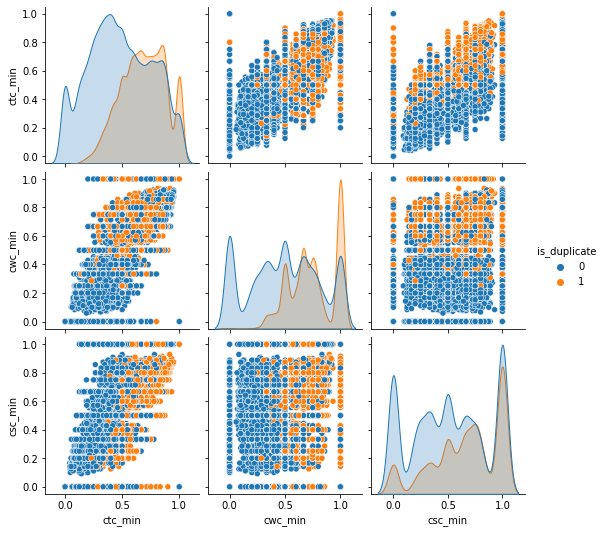

In [ ]:
# Relationship between minimum common word ,common stopword,common token is duplicate
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

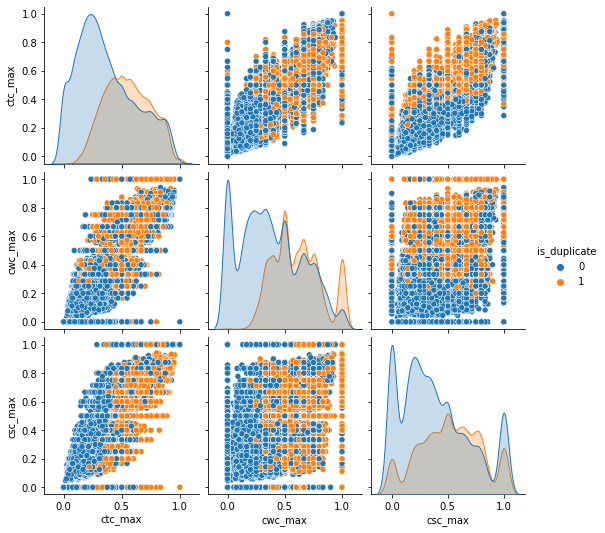

In [ ]:
# Relationship between maximum common word ,common stopword,common token is duplicate
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')

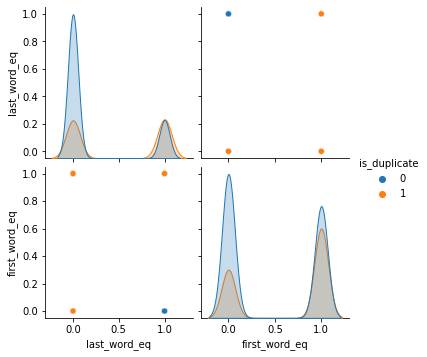

In [ ]:
# Relationship between last_word_equal , first_word_equal with is duplicate
sns.pairplot(new_df[['last_word_eq','first_word_eq','is_duplicate']],hue='is_duplicate')

**2. Length Based Features**

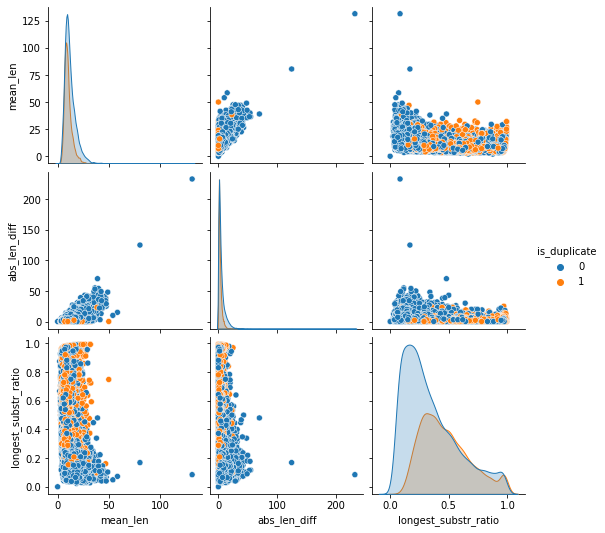

In [ ]:
# Relationship between mean_length of word ,absolute_length_difference ,longest_substr_ratio(length of string/min(string))
sns.pairplot(new_df[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']],hue='is_duplicate')

**3. Fuzzy Features**

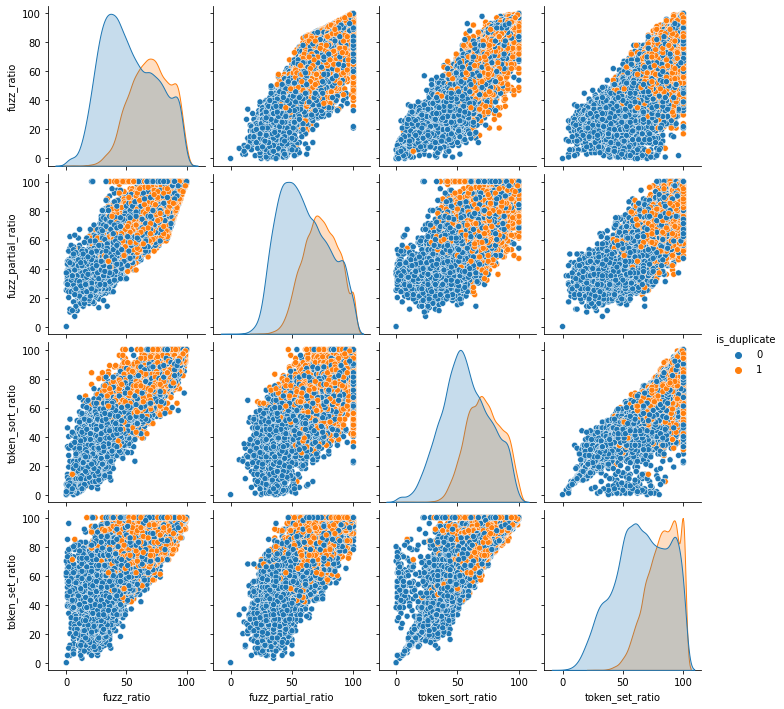

In [ ]:
# Relationship between fuzz_ratio ,fuzz_partial_ratio ,token_sort_ratio ,token_set_ratio(unique_tokens) with is_duplicate
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

### **6. 3D Visualization:**

**Dimentionality reduction**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max',
                                         'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' ,
                                         'last_word_eq', 'first_word_eq','abs_len_diff',
                                         'mean_len','longest_substr_ratio','fuzz_ratio',
                                         'fuzz_partial_ratio','token_sort_ratio','token_set_ratio']])
y = new_df['is_duplicate'].values

**By Using PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit_transform(X)

### 2D_Visualization :

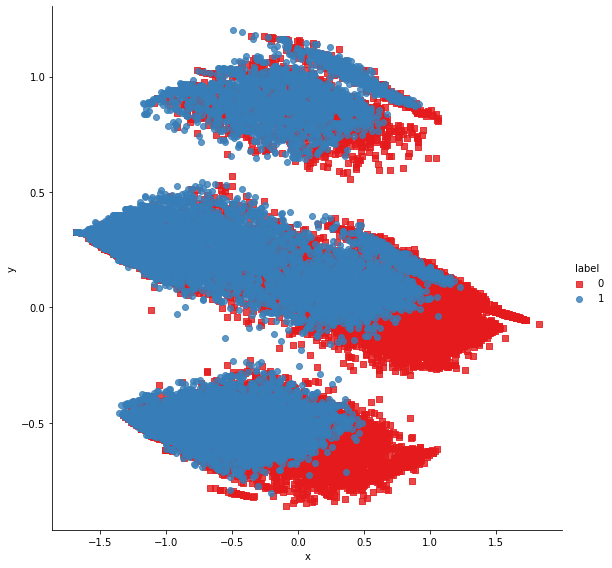

In [ ]:
x_df = pd.DataFrame({'x':pca[:,0], 'y':pca[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])

### 3D_Visualization :

In [ ]:
x_df = pd.DataFrame({'x':pca[:,0], 'y':pca[:,1],'z':pca[:,2] ,'label':y})

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x_df,x=x_df['x'],y=x_df['y'],z=x_df['z'],color=x_df['label'].astype(str))
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

**By using Tsne**

### 2D_Visualization

In [ ]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,method='barnes_hut',n_iter=1000,verbose=2,angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.124s...
[t-SNE] Computed neighbors for 30000 samples in 8.677s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

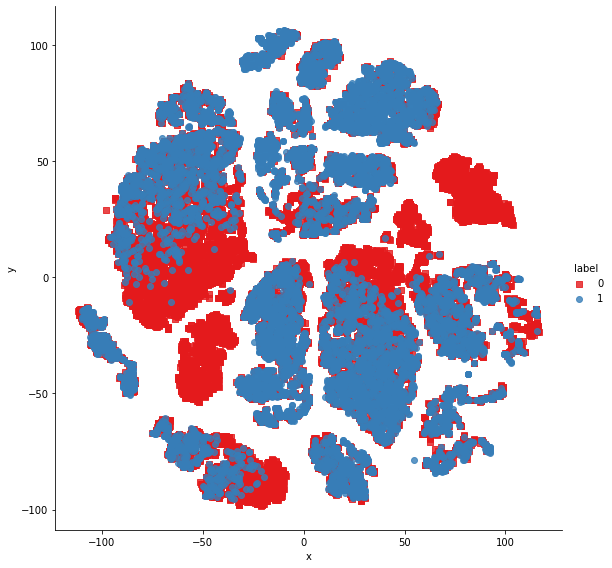

In [ ]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])

### 3D-Visualization

In [ ]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.117s...
[t-SNE] Computed neighbors for 30000 samples in 7.913s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [ ]:
x_df = pd.DataFrame({'x':tsne3d[:,0], 'y':tsne3d[:,1],'z':tsne3d[:,2] ,'label':y})

import plotly.express as px

fig = px.scatter_3d(x_df,x=x_df['x'],y=x_df['y'],z=x_df['z'],color=x_df['label'].astype(str))
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

### **7. Text Vectorization :**


In [ ]:
ques_df = new_df[['question1','question2']]
ques_df.head(3)

question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   

                                                question2  
398782  what is the best marketing automation tool for...  
115086  i am quite poor and i want to be very rich  wh...  
327711  t i e t to thapar university to thapar univers...

In [ ]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df.head(3)

is_duplicate   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
398782             1  0.874989  0.874989  0.999980  0.999980  0.923070   
115086             0  0.666644  0.499988  0.714276  0.624992  0.583328   
327711             0  0.000000  0.000000  0.428565  0.272725  0.149999   

         ctc_max  last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782  0.923070           1.0            1.0           0.0      13.0   
115086  0.466664           1.0            1.0           3.0      13.5   
327711  0.115384           0.0            0.0           6.0      23.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.855263          99                  99   
115086              0.224490          69                  67   
327711              0.047619          26                  29   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  
327711                34               43

**Counter Vectorizer(Bag of words)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=600)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 1200)

**Concatinate vectorizer features with Basic and Advance Feature**

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head(3)

(30000, 1216)


is_duplicate   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
398782             1  0.874989  0.874989  0.999980  0.999980  0.923070   
115086             0  0.666644  0.499988  0.714276  0.624992  0.583328   
327711             0  0.000000  0.000000  0.428565  0.272725  0.149999   

         ctc_max  last_word_eq  first_word_eq  abs_len_diff  ...  590  591  \
398782  0.923070           1.0            1.0           0.0  ...    0    0   
115086  0.466664           1.0            1.0           3.0  ...    0    0   
327711  0.115384           0.0            0.0           6.0  ...    0    0   

        592  593  594  595  596  597  598  599  
398782    0    0    0    0    0    0    0    0  
115086    0    0    0    0    0    0    0    0  
327711    0    0    0    0    0    0    0    0  

[3 rows x 1216 columns]

In [ ]:
final_df = pd.concat([final_df, basic_df], axis=1)
print(final_df.shape)
final_df.head(3)

(30000, 1223)


is_duplicate   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
398782             1  0.874989  0.874989  0.999980  0.999980  0.923070   
115086             0  0.666644  0.499988  0.714276  0.624992  0.583328   
327711             0  0.000000  0.000000  0.428565  0.272725  0.149999   

         ctc_max  last_word_eq  first_word_eq  abs_len_diff  ...  597  598  \
398782  0.923070           1.0            1.0           0.0  ...    0    0   
115086  0.466664           1.0            1.0           3.0  ...    0    0   
327711  0.115384           0.0            0.0           6.0  ...    0    0   

        599  q1_len  q2_len  q1_num_words  q2_num_words  word_total  \
398782    0      45      65             8            13          21   
115086    0      19      54             4            15          16   
327711    0      75     102            11            20          25   

        word_common  word_share  
398782            8        0.38  
115086            4        0.25  
327711            0        0.00  

[3 rows x 1223 columns]

### **8. Train_Test split :**


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,
                                                 test_size=0.2,random_state=1)
X_train.shape,X_test.shape

((24000, 1222), (6000, 1222))

### **9. Model Apply :**


#### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy_score -',accuracy_score(y_test,y_pred))

Accuracy_score - 0.7853333333333333


In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion_matrix -\n',confusion_matrix(y_test,y_pred))

Confusion_matrix -
 [[3246  566]
 [ 732 1456]]


#### XGBClassifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Accuracy_score -',accuracy_score(y_test,y_pred))
print('Confusion_matrix -\n',confusion_matrix(y_test,y_pred))

Accuracy_score - 0.7936666666666666
Confusion_matrix -
 [[3256  556]
 [ 682 1506]]


In [ ]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

In [ ]:
import pickle
pickle.dump(STOP_WORDS,open('STOP_WORDS.pkl','wb'))

In [ ]:
import re
from bs4 import BeautifulSoup
import distance
from fuzzywuzzy import fuzz
import pickle
import numpy as np
from nltk.stem.porter import PorterStemmer

In [ ]:
def preprocess(q):

  # Lower_case
  q = str(q).lower().strip()

  # Replace certain special characters with their string equivalents
  q = q.replace('%',' percent')
  q = q.replace('$',' dollar ')
  q = q.replace('₹', ' rupee ')
  q = q.replace('€', ' euro ')
  q = q.replace('@', ' at ')

  # The pattern '[math]' appears around 900 times in the whole dataset.
  q = q.replace('[math]','')

  # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
  q = q.replace(',000,000,000 ','b ')
  q = q.replace(',000,000 ','m ')
  q = q.replace(',000 ','k ')
  q = re.sub(r'([0-9]+)000000000', r'\1b',q)
  q = re.sub(r'([0-9]+)000000', r'\1m', q)
  q = re.sub(r'([0-9]+)000', r'\1k', q)

  # Decontracting words
  # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
  # https://stackoverflow.com/a/19794953
  contractions = {
          "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
  }

  q_decontracted = []
  for word in q.split():
    if word in contractions:
      word = contractions[word]
    q_decontracted.append(word)
  q = ' '.join(q_decontracted)

  # Take other short form
  q = q.replace("'ve", " have")
  q = q.replace("n't", " not")
  q = q.replace("'re", " are")
  q = q.replace("'ll", " will")

  # Remove HTML_tags
  q = BeautifulSoup(q)
  q = q.get_text()

  # Remove punctuations
  pattern = re.compile('\W')
  q = re.sub(pattern, ' ', q).strip()

  return q

In [ ]:
def fetch_fuzzy_features(q1,q2):

  fuzzy_features = [0.0]*4

  # fuzzy_ratio
  fuzzy_features[0] = fuzz.QRatio(q1,q2)

  # fuzzy_partial_ratio
  fuzzy_features[1] = fuzz.partial_ratio(q1,q2)

  # token_sort_ratio
  fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)

  # token_set_ratio
  fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)

  return fuzzy_features

In [ ]:
def fetch_length_features(q1,q2):

  length_features = [0.0]*3

  # Converting sentence into tokens
  q1_tokens = q1.split()
  q2_tokens = q2.split()

  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return length_features

  # abs_len_diff -(Absolute length features)
  length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

  # mean_len -(Average token length of both question)
  length_features[1] = (len(q1_tokens) + len(q2_tokens))/2\

  # longest_substr_ratio - (longest substring ratio)
  strs = list(distance.lcsubstrings(q1,q2))
  length_features[2] = len(strs[0]) / (min(len(q1),len(q2)) + 1)

  return length_features

In [ ]:
def fetch_token_features(q1,q2):

  SAFE_DIV = 0.0001 # Used for denomineator never be zero
 
  # It give if any null present in question1 and 2 is return 0 for 8 token feature
  token_features = [0.0]*8

  # Converting sentence in to tokens
  q1_tokens = q1.split()
  q2_tokens = q2.split()

  # it check question1 and 2 not null or not 
  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return token_features

  STOP_WORDS = pickle.load(open('/content/STOP_WORDS.pkl','rb'))

  # Get the non stopwords in Questions
  q1_words = set([word for word in q1_tokens if word not in STOP_WORDS]) 
  q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

  # Get the stopwords in Questions
  q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
  q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

  # Get number of common non-stopwords from Question pair
  common_word_count = len(q1_words.intersection(q2_words))

  # Get number of common stopwords from Question pair
  common_stop_count = len(q1_stops.intersection(q2_stops))

  # Get number of common tokens from Question pair
  common_token_count = len(set(q1_tokens).intersection(q2_tokens))

  # cwc_min - (No. of common_words/min(between q1 and q2))
  token_features[0] = common_word_count / (min(len(q1_words),len(q2_words)) + SAFE_DIV)
  # cwc_max - (No. of common_words/max(between q1 and q2))
  token_features[1] = common_word_count / (max(len(q1_words),len(q2_words)) + SAFE_DIV)
  # csc_min - (No. of common_stopword/min(between q1 and q2 stopwords))
  token_features[2] = common_stop_count / (min(len(q1_stops),len(q2_stops)) + SAFE_DIV)
  # csc_max - (No. of common_stopword/max(between q1 and q2 stopwords))
  token_features[3] = common_stop_count / (max(len(q1_stops),len(q2_stops)) + SAFE_DIV)
  # ctc_min - (No. of all unique words or tokens/min(between q1 and q2 tokens))
  token_features[4] = common_token_count / (min(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
  # ctc_max - (No. of all unique words or tokens/max(between q1 and q2 tokens))
  token_features[5] = common_token_count / (max(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)

  # Last word of both question is same or not
  token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
  # First word of both question is same or not
  token_features[7] = int(q1_tokens[0] == q2_tokens[0])

  return token_features

In [ ]:
# Total_common_words from question1 and question2
def common_word(q1,q2):
  w1 = set(map(lambda word: word.lower().strip(),q1.split(" ")))
  w2 = set(map(lambda word: word.lower().strip(),q2.split(" ")))
  return (len(w1) & len(w2))

In [ ]:
# Total_words from question1 and question2
def total_word(q1,q2):
  w1 = set(map(lambda word: word.lower().strip(),q1.split(" ")))
  w2 = set(map(lambda word: word.lower().strip(),q2.split(" ")))
  return (len(w1) + len(w2))

In [ ]:
def query_point_creator(q1,q2):

  input_query = []

  # preprocess function
  q1 = preprocess(q1)
  q2 = preprocess(q2)

  # Fetch Basic Features
  # q1 and q2 length
  input_query.append(len(q1))
  input_query.append(len(q2))

  # q1_word and q2_word length
  input_query.append(len(q1.split(' ')))
  input_query.append(len(q2.split(' ')))

  # Total_words from question1 and question2
  input_query.append(total_word(q1,q2))
  # Total_common_words from question1 and question2
  input_query.append(common_word(q1,q2))
  # Word_share word_common from total_word
  input_query.append(round(common_word(q1,q2)/total_word(q1,q2),2))

  # Fetch Advance Features
  # Token Features
  token_feature = fetch_token_features(q1,q2)
  input_query.extend(token_feature)

  # Length Based Features
  length_features = fetch_length_features(q1,q2)
  input_query.extend(length_features)

  # Fuzzy Features
  fuzzy_features = fetch_fuzzy_features(q1,q2)
  input_query.extend(fuzzy_features)

  # Counter_Vectorizer
  # Bag_of_word feature for q1
  q1_bow = cv.transform([q1]).toarray()

  # Bag_of_word feature for q2
  q2_bow = cv.transform([q2]).toarray()

  return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [ ]:
q1 = 'Where is the capital of India?'
q2 = ' '
q3 = 'Which city serves as the capital of India?'
q4 = 'Where is the capital of India'

In [ ]:
rf.predict(query_point_creator(q1,q4))


array([0])